# Daily Cases Trend for COVID19 data

## Tutorial on visualizing the trend of daily cases for specific country

**Today's video will cover following:**

1. **Getting Covid-19 data from Johns Hopkins github repository**
2. **Preprocessing the data in the format needed for the visualization**
3. **Creating a line chart to visualize the trend of daily cases using matplotlib and plotly**

**Dependencies**

In [145]:
import pandas as pd
pd.set_option('max_rows',20)
import plotly.express as px
import plotly.io as pio
#print(pio.renderers)
# pio.renderers.default = "browser"
import matplotlib.pyplot as plt

In [146]:
CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
DEAD_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

**Getting the data into dataframes**

In [147]:
covid_confirmed_ts = pd.read_csv(CONFIRMED_URL)
covid_recovered_ts = pd.read_csv(RECOVERED_URL)
covid_dead_ts = pd.read_csv(DEAD_URL)

In [148]:
conf_ts = covid_confirmed_ts
conf_ts.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,795,803,820,832,842,850,856,868,872,876
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,748,750,751,751,752,752,754,755,755,758
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,35,35,36,36,36,43,43,45,45,45


**Filtering Data for a specific country**

In [149]:
conf_ts_cntry = conf_ts[conf_ts['Country/Region']=='United Kingdom']
conf_ts_cntry.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
217,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,...,115,115,115,118,118,118,118,118,119,121
218,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,74,75,78,78,80,81,81,81,84,85
219,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,...,544,544,545,545,545,545,545,545,546,547
220,Gibraltar,United Kingdom,36.1408,-5.3536,0,0,0,0,0,0,...,144,144,144,144,144,146,146,146,147,148
221,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,...,321,325,326,327,329,329,329,330,330,331
222,Montserrat,United Kingdom,16.7425,-62.1874,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,186599,190584,194990,201101,206715,211364,215260,219183,223060,226463
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,6,6,6,7,7,7,7,7,7,7
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


**Transposing the time series**

In [150]:
conf_ts_cntry.T[4:]

,217,218,219,220,221,222,223,249,250,251,258
1/22/20,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5/8/20,118,81,545,146,329,11,211364,3,7,12,13
5/9/20,118,81,545,146,329,11,215260,3,7,12,13
5/10/20,118,81,545,146,330,11,219183,3,7,12,13
5/11/20,119,84,546,147,330,11,223060,3,7,12,13


**Aggregating multiple columns**

In [151]:
conf_ts_cntry.T[4:].sum(axis='columns')

1/22/20         0.0
1/23/20         0.0
1/24/20         0.0
1/25/20         0.0
1/26/20         0.0
             ...   
5/8/20     212629.0
5/9/20     216525.0
5/10/20    220449.0
5/11/20    224332.0
5/12/20    227741.0
Length: 112, dtype: float64

**Get the first difference series to get daily delta**

In [152]:
conf_ts_cntry.T[4:].sum(axis='columns').diff()

1/22/20       NaN
1/23/20       0.0
1/24/20       0.0
1/25/20       0.0
1/26/20       0.0
            ...  
5/8/20     4652.0
5/9/20     3896.0
5/10/20    3924.0
5/11/20    3883.0
5/12/20    3409.0
Length: 112, dtype: float64

**Plot**

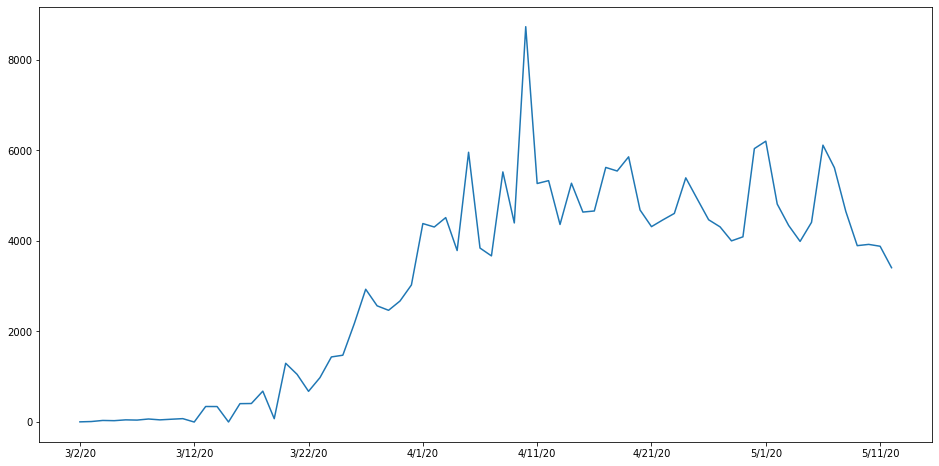

In [153]:
myplot = conf_ts_cntry.T[4:].sum(axis='columns').diff()[40:].plot(figsize=(16,8))

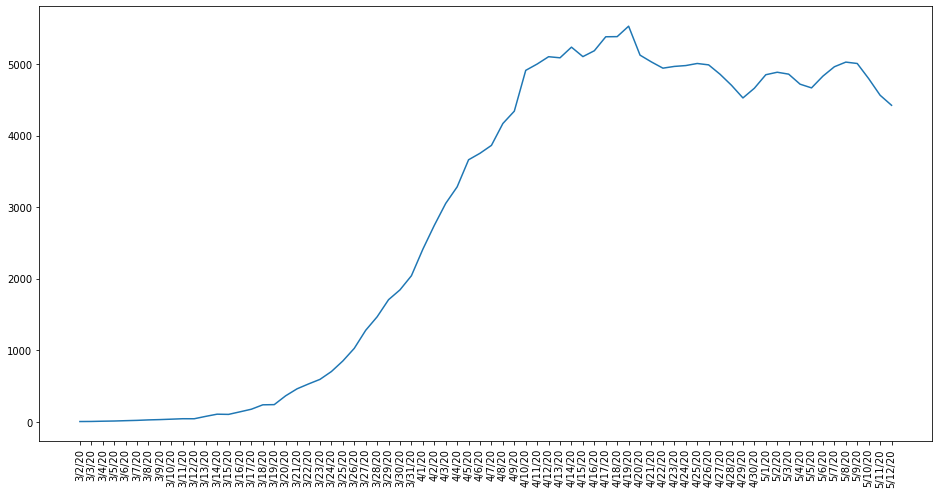

In [154]:
plt.figure(figsize=(16,8))
plt.plot(conf_ts_cntry.T[4:].sum(axis='columns').diff().rolling(window=10).mean()[40:]);
plt.xticks(rotation=90);

**Create Function**

In [155]:
def plot_covid_ma(data,cntry='US',window=3):
    conf_ts = data
    conf_ts_cntry = conf_ts[conf_ts['Country/Region']==cntry]
    myplot = conf_ts_cntry.T[4:].sum(axis='columns').diff().rolling(window=window).mean()[40:].plot(figsize=(10,8),title='Daily Cases Trend for {}'.format(cntry),legend=False,color='maroon')
    return myplot

### Confirmed Cases Trend

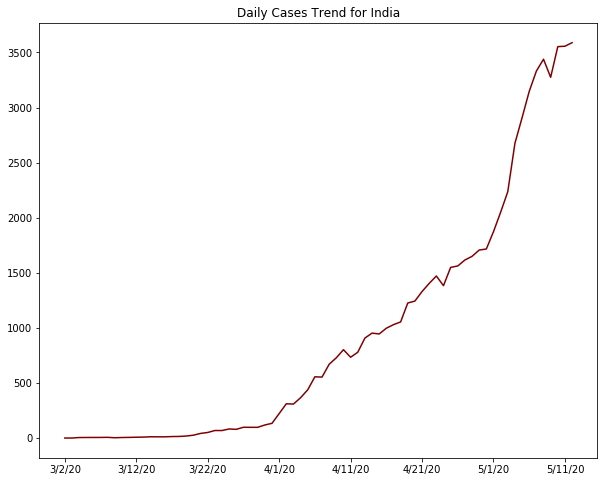

In [156]:
plot_covid_ma(data=covid_confirmed_ts,cntry='India',window=5);

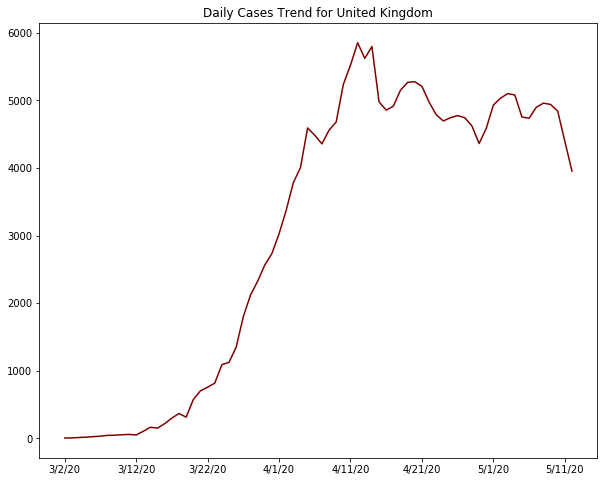

In [157]:
plot_covid_ma(data=covid_confirmed_ts,cntry='United Kingdom',window=5);

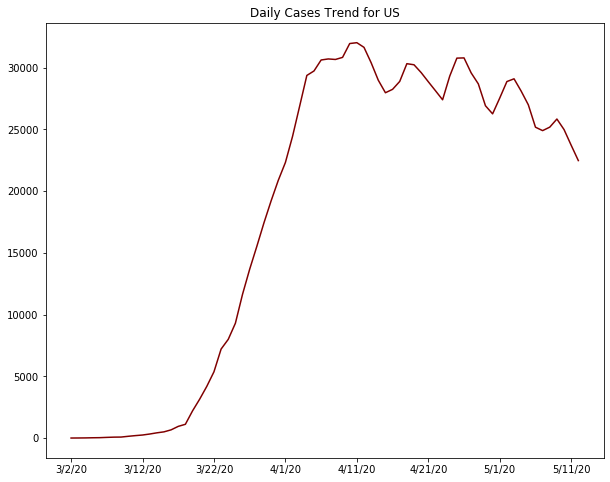

In [169]:
plot_covid_ma(data=covid_confirmed_ts,cntry='US',window=5);

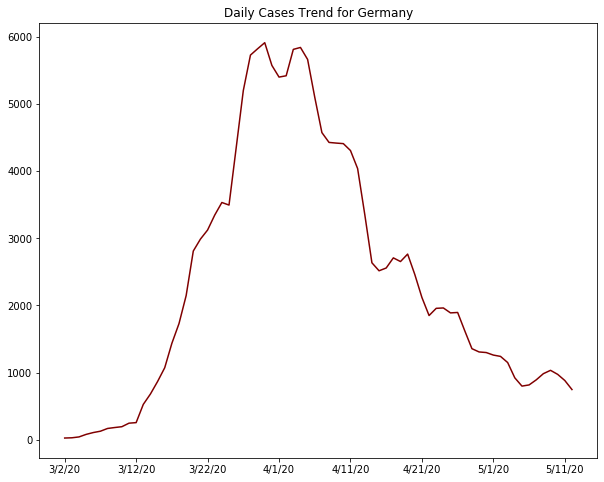

In [159]:
plot_covid_ma(data=covid_confirmed_ts,cntry='Germany',window=5);

### Deaths

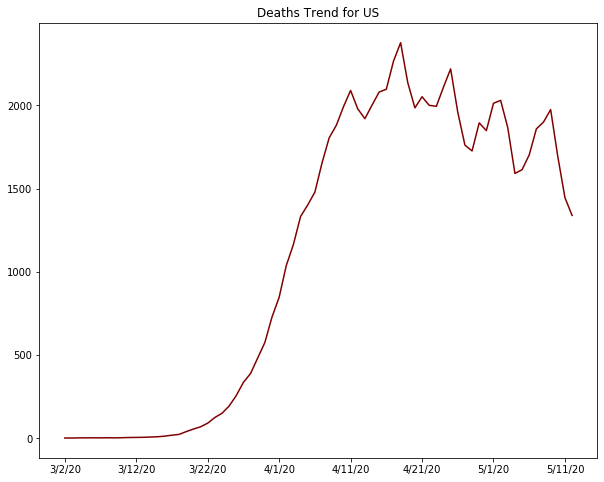

In [168]:
plot_covid_ma(data=covid_dead_ts,cntry='US',window=5);
plt.title('Deaths Trend for US');

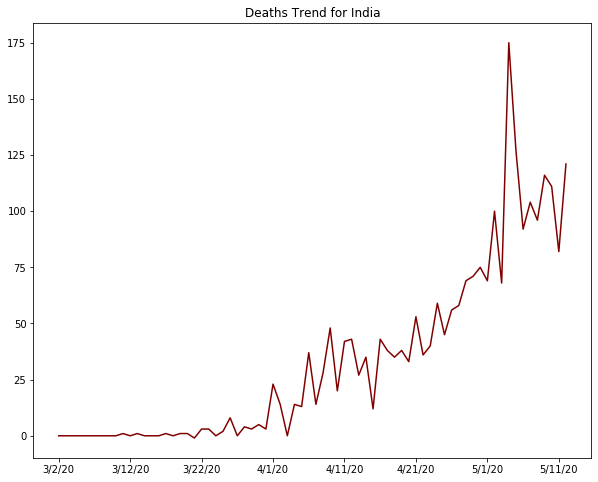

In [161]:
plot_covid_ma(data=covid_dead_ts,cntry='India',window=1);
plt.title('Deaths Trend for India');

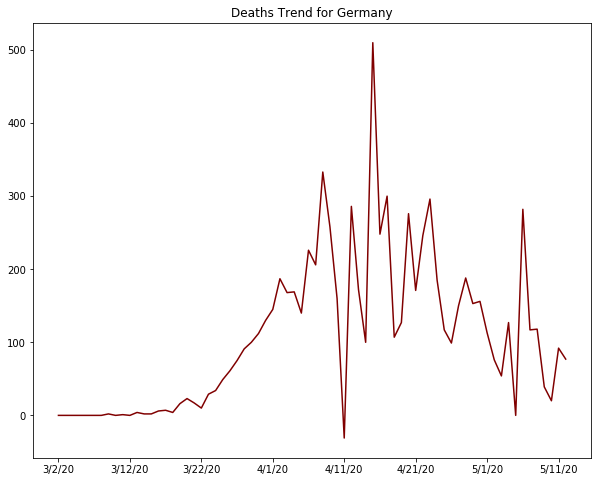

In [162]:
plot_covid_ma(data=covid_dead_ts,cntry='Germany',window=1);
plt.title('Deaths Trend for Germany');
#Population of Germany = 83 Million
#Population of US = 328 Million (almost 4 times)

### Using Plotly

In [163]:
def process_data(data,cntry='US',window=3):
    conf_ts = data
    conf_ts_cntry = conf_ts[conf_ts['Country/Region']==cntry]
    final_dataset = conf_ts_cntry.T[4:].sum(axis='columns').diff().rolling(window=window).mean()[40:]
    df = pd.DataFrame(final_dataset,columns=['Total'])
    return df

In [164]:
df = process_data(data=covid_confirmed_ts,cntry='US',window=3)
df.head(10)

,Total
3/2/20,12.666667
3/3/20,16.666667
3/4/20,25.000000
3/5/20,39.666667
3/6/20,48.000000
3/7/20,84.333333
3/8/20,100.333333
3/9/20,107.000000
3/10/20,185.666667
3/11/20,254.333333


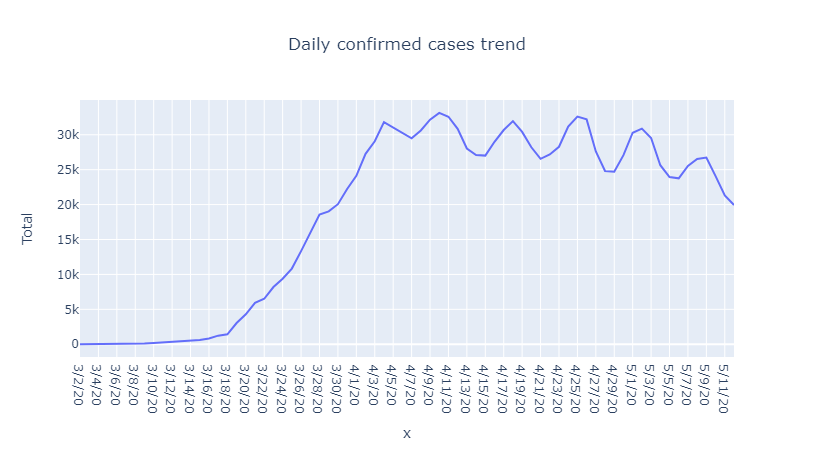

In [165]:
pio.renderers.default = "plotly_mimetype"
fig = px.line(df, y='Total', x=df.index, title='Daily confirmed cases trend')
fig.update_layout(title_x=0.5)
fig.show()

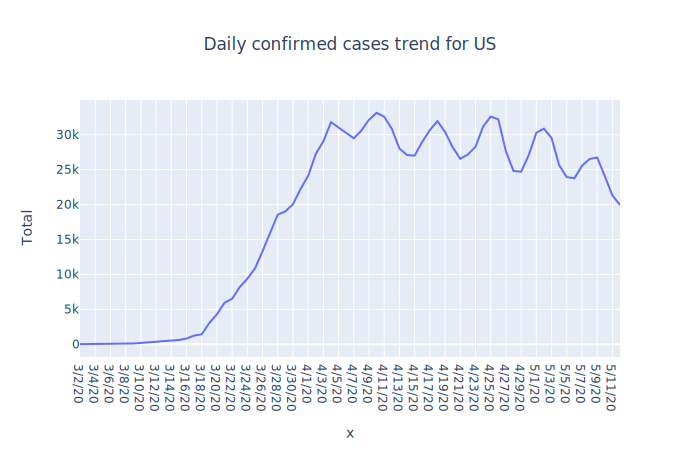

In [166]:
fig = px.line(df, y='Total', x=df.index, title='Daily confirmed cases trend for US',width=500)
fig.update_layout(title_x=0.5)
fig.show("svg") #scalable vector graphics
#fig.show("png") #Portable Network graphics

In [167]:
pio.renderers.default = "browser"
fig = px.line(df, y='Total', x=df.index, title='Daily confirmed cases trend')
fig.update_layout(title_x=0.5)
fig.show()